### Loan Approval Case Study: The data has 28 features and target variable is predict whether 
### if loan is approved or Rejected

In [2]:
#import libraries
import os
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import math as m
import xlrd
from scipy import stats
from sklearn import datasets
import matplotlib.pyplot as plt

In [3]:
# set work directory
os.getcwd()

'/home/sa05975666/13-08-2018'

In [3]:
path = os.getcwd()
itrain = pd.read_excel(str(path)+'/Aug13_NaiveBayes_Case.xlsx')

In [86]:
itrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7759 entries, 0 to 7758
Data columns (total 29 columns):
APPLICATION.ID           7759 non-null int64
DSA.ID                   7759 non-null object
DEALER.ID                7759 non-null int64
QUEUE.ID                 7759 non-null object
CURRENT.STAGE            7759 non-null object
MARITAL.STATUS           7759 non-null object
GENDER                   7759 non-null object
AGE                      7759 non-null int64
EDUCATION                7759 non-null object
RESIDENCE.TYPE           7759 non-null object
CITY                     7759 non-null object
STATE                    7759 non-null object
ZIP.CODE                 7759 non-null int64
EMPLOY.CONSTITUTION      7759 non-null object
PAN.STATUS               7759 non-null object
APPLICATION.SCORE        7759 non-null float64
APPROVED.AMOUNT          7759 non-null int64
APPLIED.AMOUNT           7759 non-null int64
LOAN.TENOR               7759 non-null int64
OWN.HOUSE.TYPE           

In [80]:
itrain.apply(lambda x: (len(x.unique()), [x.unique()]))

APPLICATION.ID           (7759, [[27497000024, 25556001005, 27220000249...
DSA.ID                   (721, [[JB02005, RD02622, SK02345, DN30900, AS...
DEALER.ID                (1095, [[27497, 25556, 27220, 27067, 26189, 27...
QUEUE.ID                  (2, [[Straight  Through Process, Under.Writer]])
CURRENT.STAGE            (8, [[PD_DE, DCLN, APRV, SRNV, INV_GNR, LOS_DI...
MARITAL.STATUS                                    (2, [[Single, Married]])
GENDER                                               (2, [[Male, Female]])
AGE                      (51, [[30, 38, 52, 57, 43, 28, 33, 23, 49, 21,...
EDUCATION                (6, [[GRADUATE, OTHERS, UNDER GRADUATE, POST-G...
RESIDENCE.TYPE           (15, [[OWNED-BUNGLOW, PARENT OWNED-HOUSE, OWNE...
CITY                     (429, [[UDHANA, BHOPAL, RAIPUR, JAMNAGAR, HYDE...
STATE                    (14, [[GUJARAT, MADHYA PRADESH, CHHATTISGARH, ...
ZIP.CODE                 (1367, [[394210, 462001, 492001, 361001, 49200...
EMPLOY.CONSTITUTION      

In [107]:
col = ['EDUCATION', 'RESIDENCE.TYPE','EMPLOY.CONSTITUTION',
       'APPLICATION.SCORE', 'APPROVED.AMOUNT','STATE', 'MARITAL.STATUS', 'OWN.HOUSE.TYPE',
       'PAN.STATUS', 'CURRENT.STAGE','LOAN.TENOR']

In [21]:
# dump = ['APPLICATION.ID', 'APPLIED.AMOUNT','PRIMARY.ASSET.MODELNO']
# train = itrain.drop(dump, axis =1)

# itrain['CITY'].value_counts()

# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()

# cat = ['CURRENT.STAGE','MARITAL.STATUS', 'GENDER', 'EDUCATION', 'RESIDENCE.TYPE',
#        'CITY', 'STATE', 'ZIP.CODE', 'EMPLOY.CONSTITUTION', 'PAN.STATUS',
#        'OWN.HOUSE.TYPE', 'PRIMARY.ASSET.CTG', 'PRIMARY.ASSET.MAKE','DRIVING_LICENSE', 'AADHAAR',
#        'PAN', 'BANK_PASSBOOK', 'VOTER_ID', 'DSA.ID', 'DEALER.ID', 'QUEUE.ID']

# cat = ['EDUCATION', 'RESIDENCE.TYPE', 'EMPLOY.CONSTITUTION',
#        'OWN.HOUSE.TYPE','PAN.STATUS', 'CURRENT.STAGE']

# for i in cat:
#     train[i] = le.fit_transform(train[i])

### numbers Approved vs Rejected

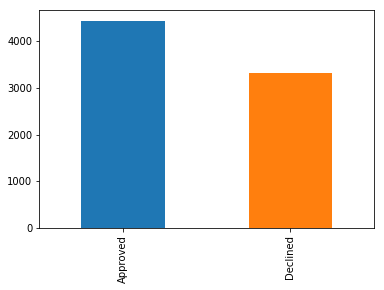

In [97]:
itrain['APPLICATION.STATUS'].value_counts().plot.bar()

### Analysing using Pivot tables

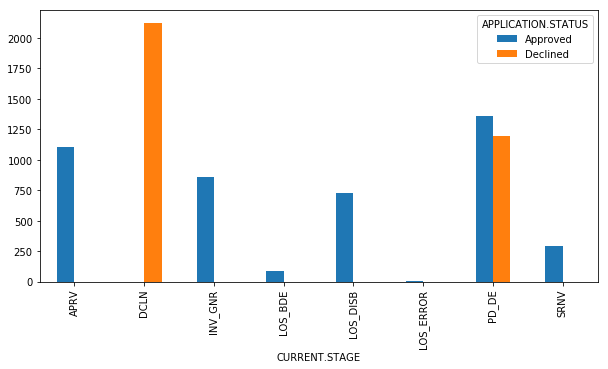

In [22]:
temp = pd.pivot_table(data = itrain, index = 'CURRENT.STAGE', columns = 'APPLICATION.STATUS', values = 'APPLICATION.ID', 
               aggfunc = 'count').plot.bar(figsize = (10,5))

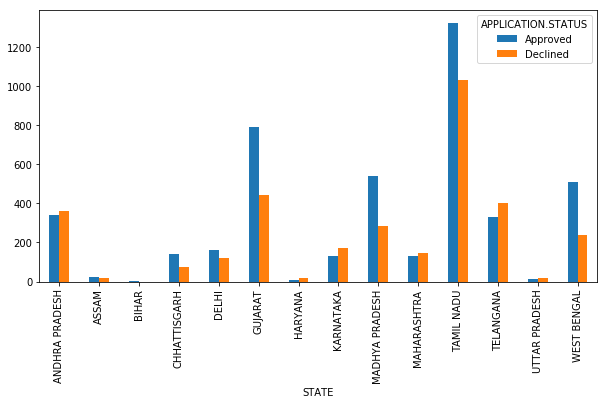

In [95]:
temp = pd.pivot_table(data = itrain, index = 'STATE', columns = 'APPLICATION.STATUS', values = 'APPLICATION.ID', 
               aggfunc = 'count').plot.bar(figsize = (10,5))

In [27]:
temp = pd.pivot_table(data = itrain, index = 'CURRENT.STAGE', columns = 'APPLICATION.STATUS', values = 'APPLICATION.ID', 
               aggfunc = 'count', margins = True)
temp['Percent'] = temp['Approved']/temp['All'] * 100

APPLICATION.STATUS,Approved,Declined,All,Percent
CURRENT.STAGE,,,,
APRV,1107.0,NaN,1107,100.000000
DCLN,NaN,2123.0,2123,NaN
INV_GNR,856.0,NaN,856,100.000000
LOS_BDE,86.0,NaN,86,100.000000
LOS_DISB,729.0,1.0,730,99.863014
LOS_ERROR,5.0,1.0,6,83.333333
PD_DE,1359.0,1197.0,2556,53.169014
SRNV,295.0,NaN,295,100.000000
All,4437.0,3322.0,7759,57.185204


In [29]:
temp = pd.pivot_table(data = itrain, index = 'EDUCATION', columns = 'APPLICATION.STATUS', values = 'APPLICATION.ID', 
               aggfunc = 'count', margins = True)
temp['Percent'] = temp['Approved']/temp['All'] * 100
temp

APPLICATION.STATUS,Approved,Declined,All,Percent
EDUCATION,,,,
DOCTORATE,8,4,12,66.666667
GRADUATE,2505,1752,4257,58.844257
OTHERS,637,590,1227,51.915240
POST-GRADUATE,255,164,419,60.859189
PROFESSIONAL,18,14,32,56.250000
UNDER GRADUATE,1014,798,1812,55.960265
All,4437,3322,7759,57.185204


In [30]:
temp = pd.pivot_table(data = itrain, index = 'QUEUE.ID', columns = 'APPLICATION.STATUS', values = 'APPLICATION.ID', 
               aggfunc = 'count', margins = True)
temp['Percent'] = temp['Approved']/temp['All'] * 100
temp

APPLICATION.STATUS,Approved,Declined,All,Percent
QUEUE.ID,,,,
Straight Through Process,3454,1918,5372,64.296351
Under.Writer,983,1404,2387,41.181399
All,4437,3322,7759,57.185204


In [58]:
temp = pd.pivot_table(data = itrain, index = 'RESIDENCE.TYPE', columns = 'APPLICATION.STATUS', values = 'APPLICATION.ID', 
               aggfunc = 'count', margins = True)
temp['Percent'] = temp['Approved']/temp['All'] * 100
temp

APPLICATION.STATUS,Approved,Declined,All,Percent
RESIDENCE.TYPE,,,,
COMPANY PROVIDED-FLAT,22.0,11.0,33,66.666667
COMPANY PROVIDED-HOUSE,27.0,22.0,49,55.102041
OWNED-BUNGLOW,627.0,379.0,1006,62.326044
OWNED-CHAWL,169.0,115.0,284,59.507042
OWNED-FLAT,720.0,434.0,1154,62.391681
OWNED-PENTHOUSE,423.0,246.0,669,63.228700
OWNED-ROWHOUSE,643.0,421.0,1064,60.432331
PARENT OWNED-FLAT,45.0,38.0,83,54.216867
PARENT OWNED-HOUSE,826.0,475.0,1301,63.489623


In [108]:
train = itrain[col]
train_en = pd.get_dummies(data = train)

In [109]:
predictors = train_en.copy()
target = itrain['APPLICATION.STATUS'].replace({'Approved' : 1, 'Declined' : 0})

In [110]:
predictors.shape

(7759, 61)

### Model & Metrics

In [111]:

#importing packages from sk learn
#from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import RFE


#FUNCTION for Train & Validation set
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.3, 
                                                    random_state = 70)

# training a Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb = gnb.fit(X_train, y_train)
gnb_predictions = gnb.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, gnb_predictions))

 
# accuracy on X_test
accuracy = gnb.score(X_test, y_test)
print(accuracy)
 
# creating a confusion matrix
NbCM = pd.crosstab(y_test, gnb_predictions)
NbCM

             precision    recall  f1-score   support

          0       0.87      0.99      0.93      1021
          1       0.99      0.89      0.94      1307

avg / total       0.94      0.93      0.93      2328

0.9342783505154639


col_0,0,1
APPLICATION.STATUS,,
0,1015,6
1,147,1160


### ROC Curve

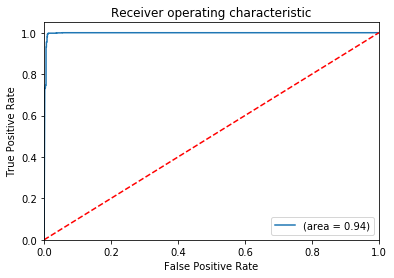

In [112]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
nb_roc_auc = roc_auc_score(y_test, gnb.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, gnb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='(area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [11]:
#selector = RFE(gnb, 5, step=1)
#selector = selector.fit(X_train, y_train)
#selector.support_ 
#selector.ranking_